# 1
### Data Loading and Cleaning

#### Documentation
    - first import panda
    - define the file path before loading into dataframe

In [64]:
import pandas as pd

# Path to Excel file
file_path = r'C:\Users\user\OneDrive\Documents\datahackerman_c3rz\redzone_project\online_retail\online_retail_data.xlsx'

# Load the Excel file
df_retail_data = pd.read_excel(file_path)

# Check the first five rows
print(df_retail_data.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


### Identify missing values 

#### Documention
    - first identify missing values using df.isnull
    - then remove columns with more than 60% missing values
    - remove duplicates using based on set threshold values

In [67]:
# Identify missing values
print("\nMissing values per column:")
print(df_retail_data.isnull().sum())


Missing values per column:
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [68]:
# Drop columns with >60% missing values
threshold = len(df_retail_data) * 0.6
df_retail_data_cleaned = df_retail_data.dropna(thresh=threshold, axis=1)

In [69]:
print(df_retail_data_cleaned)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95 

In [54]:
# Drop duplicates
df_retail_data = df_retail_data.drop_duplicates()

In [74]:
df_retail_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


# 2
### Exploratory Data Analysis (EDA)

#### Documentation
    - Calculate the mean, median, min, max, and standard deviation values of the Price and Quamtity
    - Use collections.Counter to check frequencies for Quantity and Description

#### Statistics

In [157]:
# Statistics summary

print(df_retail_data.describe())

statistics = {
    'Price': {
        'mean': df_retail_data['Price'].mean(),
        'median': df_retail_data['Price'].median(),
        'min': df_retail_data['Price'].min(),
        'max': df_retail_data['Price'].max(),
        'std': df_retail_data['Price'].std()
    },
   'Quantity': {
        'mean': df_retail_data['Quantity'].mean(),
        'median': df_retail_data['Quantity'].median(),
        'min': df_retail_data['Quantity'].min(),
        'max': df_retail_data['Quantity'].max(),
        'std': df_retail_data['Quantity'].std()
    }
}

print("\n\nStatistics: ")
print(pd.DataFrame(stats))

            Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.360000   
25%         1.000000            2010-03-21 12:20:00       1.250000   
50%         3.000000            2010-07-06 09:51:00       2.100000   
75%        10.000000            2010-10-15 12:45:00       4.210000   
max     19152.000000            2010-12-09 20:01:00   25111.090000   
std       107.424110                            NaN     146.126914   

         Customer ID  
count  417534.000000  
mean    15360.645478  
min     12346.000000  
25%     13983.000000  
50%     15311.000000  
75%     16799.000000  
max     18287.000000  
std      1680.811316  


Statistics: 
               Price      Quantity
mean        4.688834     10.337667
median      2.100000      3.000000
min    -53594.360000  -9600.000000
max    

#### Data Aggregation: Using Python collections

In [173]:
from collections import Counter

# Top 5 countries with most transactions
country_counter = Counter(df_retail_data['Country'])
print("\nTop Five Transactions by Countries:")
print(country_counter.most_common(5))

# Top 5 products sold
product_counter = Counter(df_retail_data['Description'])
print("\nTop Five Products Sold:")
print(product_counter.most_common(5))


Top Five Transactions by Countries:
[('United Kingdom', 485852), ('EIRE', 9670), ('Germany', 8129), ('France', 5772), ('Netherlands', 2769)]

Top Five Products Sold:
[('WHITE HANGING HEART T-LIGHT HOLDER', 3549), (nan, 2928), ('REGENCY CAKESTAND 3 TIER', 2212), ('STRAWBERRY CERAMIC TRINKET BOX', 1843), ('PACK OF 72 RETRO SPOT CAKE CASES', 1466)]


#### Data Aggregation: Aggregate numerical data

In [182]:
# March column
df_retail_data['March'] = df_retail_data['InvoiceDate'].dt.to_period('M')

# Group by Country and Month
grouped = df_retail_data.groupby(['Country', 'March']).agg({
    'Quantity': 'sum',
    'Price': 'mean'
}).reset_index()

print(grouped.head(5))
print("\nBottom five variables")
print(grouped.tail(5))

     Country    March  Quantity      Price
0  Australia  2009-12        53   2.209259
1  Australia  2010-02       624   1.882188
2  Australia  2010-03       191   2.875789
3  Australia  2010-04       560   2.710588
4  Australia  2010-05       665  37.637049

Bottom five variables
         Country    March  Quantity      Price
293  Unspecified  2010-04       153   4.230000
294  Unspecified  2010-07      1275  19.554493
295  Unspecified  2010-09      1244   3.314955
296  Unspecified  2010-11       363   2.586275
297  West Indies  2010-08       395   2.273519


#### Data Aggregation: Visualization

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

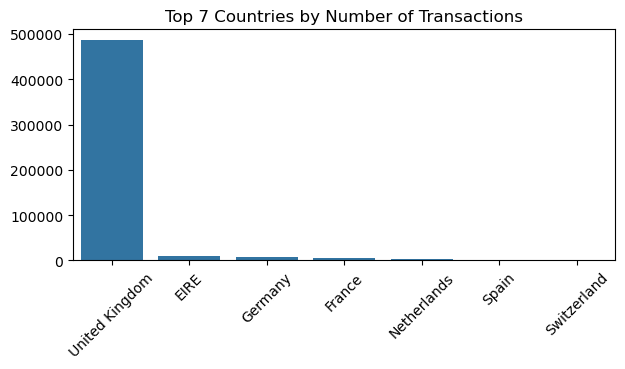

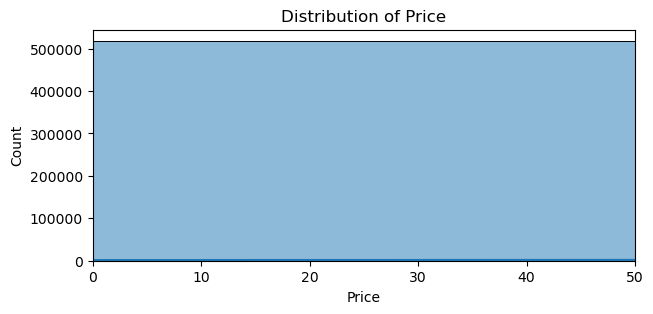

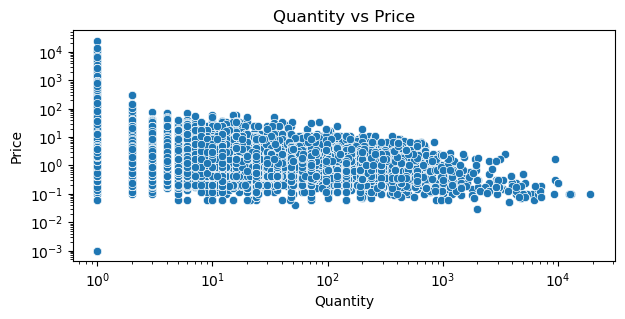

In [195]:
# Bar chart: Top 7 countries
top_countries = country_counter.most_common(7)
countries, counts = zip(*top_countries)

plt.figure(figsize=(7,3))
sns.barplot(x=list(countries), y=list(counts))
plt.title('Top 7 Countries by Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Histogram: Price distribution
plt.figure(figsize=(7,3))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlim(0, 50)  # Optional: limit x-axis to see better
plt.show()

# Scatter plot: Quantity vs Price
plt.figure(figsize=(7,3))
sns.scatterplot(x='Quantity', y='Price', data=df_retail_data)
plt.title('Quantity vs Price')
plt.xscale('log')  # Log scale helps if Quantity varies a lot
plt.yscale('log')
plt.show()
